In [64]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import svm

In [65]:
data1 = sio.loadmat('ex6data1')

In [66]:
dataX = data1['X']
datay = data1['y']

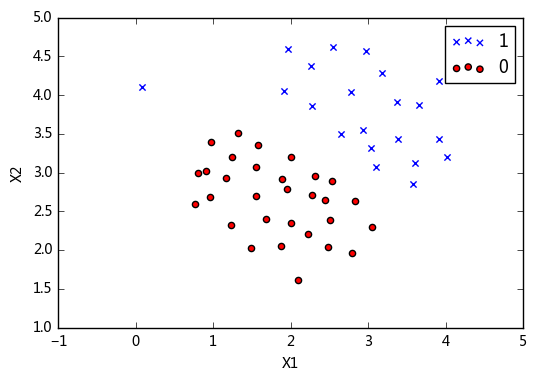

In [110]:
def plotData(X, y):
    ax1 = plt.subplot(111)
    pos = np.where(y==1)[0]
    neg = np.where(y==0)[0]
    ax1.scatter(X[pos, 0:1], X[pos, 1:2], marker='x', label='1')
    ax1.scatter(X[neg, 0:1], X[neg, 1:2], marker='o', c='r', label='0')
    ax1.legend(loc=0)
    plt.xlabel('X1')
    plt.ylabel('X2')
plotData(dataX, datay)
plt.show()

In [88]:
#train SVM
def plotBoundary(model,dataX):
    x1plot = np.linspace(dataX[:, 0:1].min(), dataX[:, 0:1].max(), 100)
    x2plot = np.linspace(dataX[:, 1:2].min(), dataX[:, 1:2].max(), 100)
    z = np.zeros((len(x1plot), len(x2plot)))
    for i in range(len(x1plot)):
        for j in range(len(x2plot)):
            z[i][j] = float(model.predict(np.array([[x1plot[i],x2plot[j]]])))
    z = z.T
    
    u, v = np.meshgrid( x1plot, x2plot )
    mycontour = plt.contour( u, v, z, [0])
    plt.title("Decision Boundary")


C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


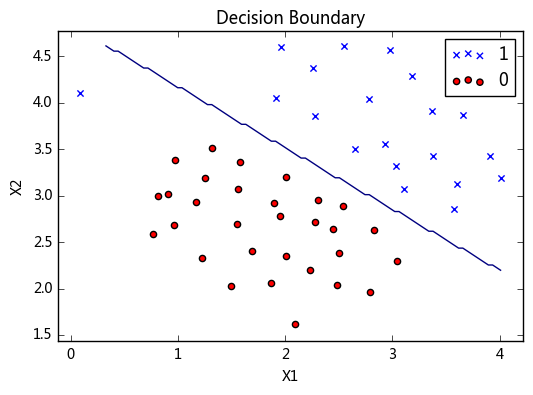

In [111]:
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit(dataX, datay.flatten())
plotData(dataX, datay)
plotBoundary(linear_svm, dataX)

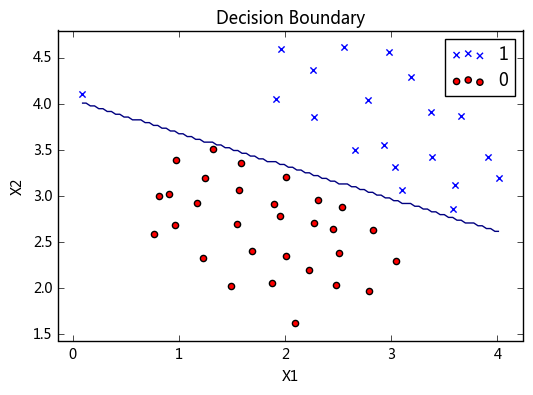

C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [83]:
#C=100
linear_svm100 = svm.SVC(C=100, kernel='linear')
linear_svm100.fit(dataX, datay.flatten())
plotData(dataX, datay)
plotBoundary(linear_svm100, dataX)

In [93]:
data2 = sio.loadmat('ex6data2.mat')
data2_X = data2['X']
data2_y = data2['y']

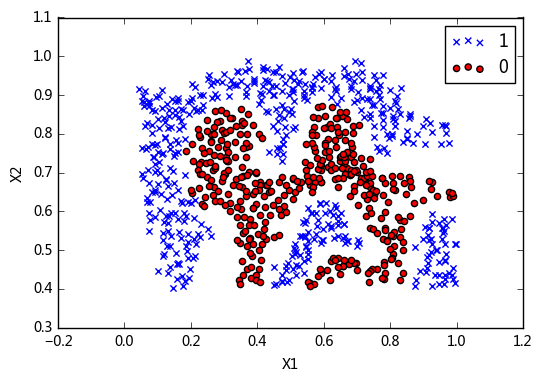

In [105]:
#plt.grid(True)
plotData(data2_X, data2_y)

C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


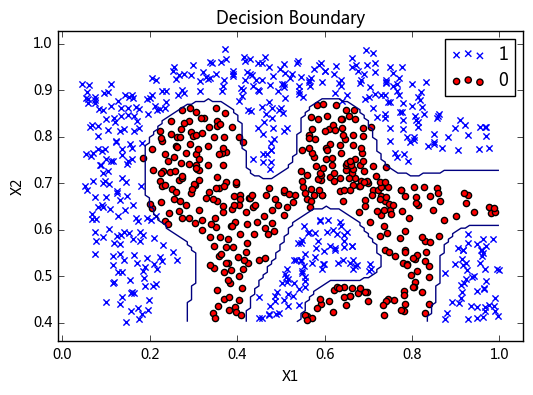

In [113]:
#Gaussion
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit( data2_X, data2_y.flatten())
plotData(data2_X, data2_y)
plotBoundary(gaus_svm,data2_X)

In [127]:
#auto choose C and sigma
data3 = sio.loadmat('ex6data3')
data3_X = data3['X']
data3_y = data3['y']

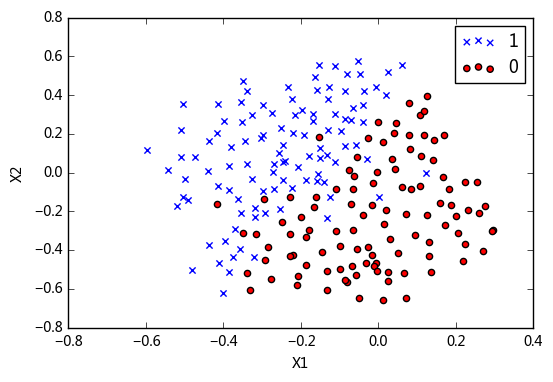

In [130]:
plotData(data3_X, data3_y)

In [135]:
C_values =  (0.01, 0.03, 0.1, 0.3, 1, 3, 10., 30.)
sigma_values = C_values
best_pair, best_score = (0,0), 0
for C in C_values:
    for sigma in sigma_values:
        gamma = np.power(sigma, -2.)
        auto_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        auto_svm.fit(data3_X, data3_y.flatten())
        temp_score = auto_svm.score(data3['Xval'], data3['yval'])
        if temp_score > best_score:
            best_score = temp_score
            best_pair = (C, sigma)
print('Best C:{}\nBest sigma:{}\nscore:{}'.format(best_pair[0], best_pair[1], best_score))

Best C:0.3
Best sigma:0.1
score:0.965


C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


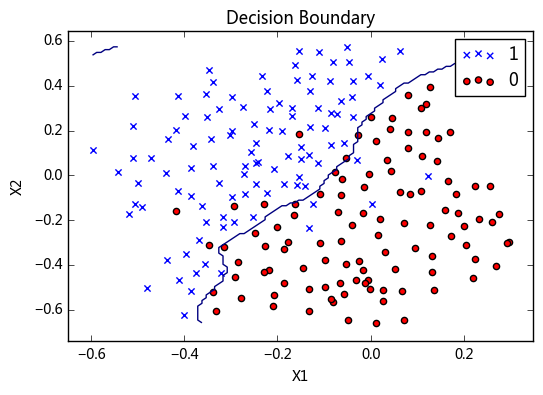

In [137]:
#Gaussion
sigma = best_pair[1]
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma=gamma)
gaus_svm.fit( data3_X, data3_y.flatten())
plotData(data3_X, data3_y)
plotBoundary(gaus_svm,data3_X)